In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
from shapely.geometry.point import Point

In [2]:
def w(k, c=100, d=16):
    return math.pow(c, k/d)

def v(k, c=100, d=16):
    return math.pow(c, (d-k-1)/d)

In [3]:
df = gpd.read_file('../geodata/ga_tiles_clipped_epsg4326.geojson')
aus = df['geometry']

def cal_ge(lon, lat, k=0):
    if aus.contains(Point((lon, lat))).any():
        if k % 2 == 0:
            return (math.sin((lon/w(k))) + math.sin((lat/v(k))))/2
        else:
            return (math.cos((lon/w(k))) + math.cos((lat/v(k))))/2
    else:
        return np.nan

In [4]:
resolution = 0.5
lon = np.arange(110, 155, resolution)
lat = np.arange(-45, -10, resolution)
X, Y = np.meshgrid(lon, lat)
cal_ge_vec = np.vectorize(cal_ge)

CPU times: user 10.6 s, sys: 6.51 ms, total: 10.6 s
Wall time: 10.6 s


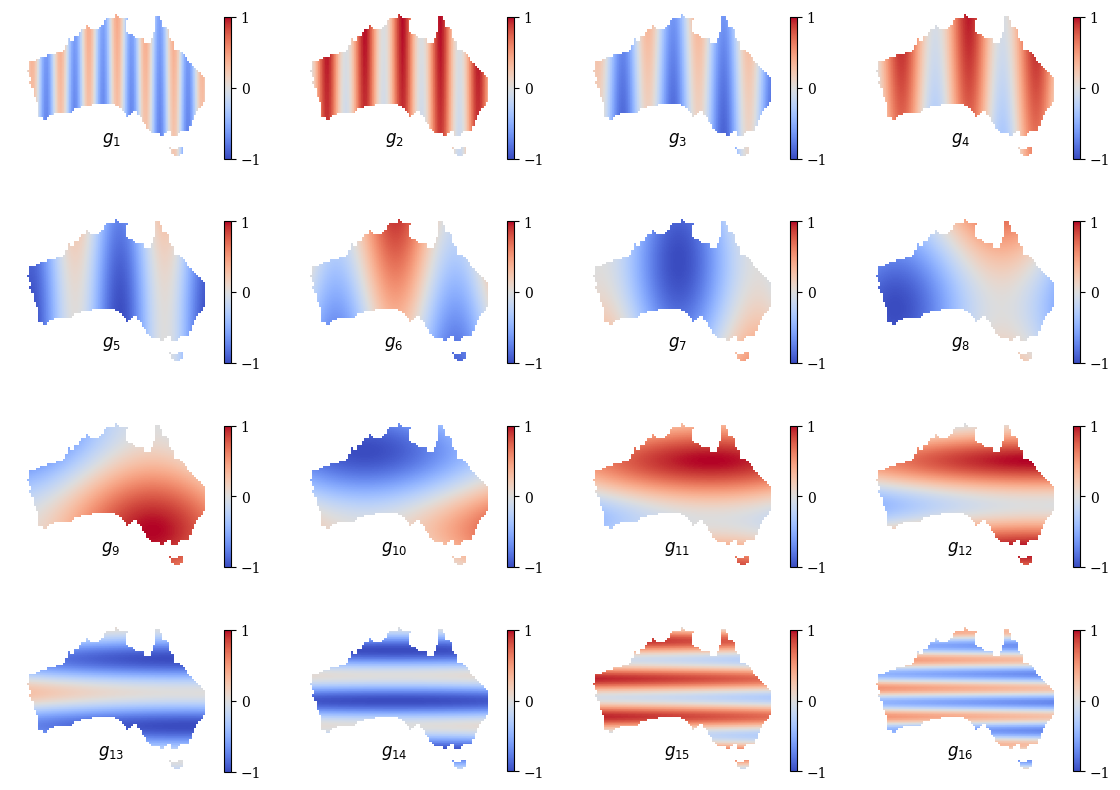

In [5]:
%%time
plt.rcParams["font.family"] = "DejaVu Serif"
fig, axs = plt.subplots(4, 4, figsize=(14, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace=.3, wspace=.2)

axs = axs.ravel()

for k in range(16):
    result = cal_ge_vec(X, Y, k)
    im = axs[k].imshow(np.flip(result, 0), cmap=cm.coolwarm, vmin=-1, vmax=1)
    axs[k].axis('off')
    axs[k].set_title(r'$g_{{{}}}$'.format(k+1), y=0.1)
    fig.colorbar(im, ticks=[-1, 0, 1], fraction=0.03)

In [6]:
fig.savefig('../figs/geoencoding.jpg', bbox_inches='tight', dpi=300)